In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

sns.set()
warnings.filterwarnings("ignore")

In [3]:
# Parameters
num_points = 4000
mean_1 = -2
mean_2 = 3
variance = 2 # Same variance for both distributions

In [4]:
colors = ['#fe7c73', '#2471A3']

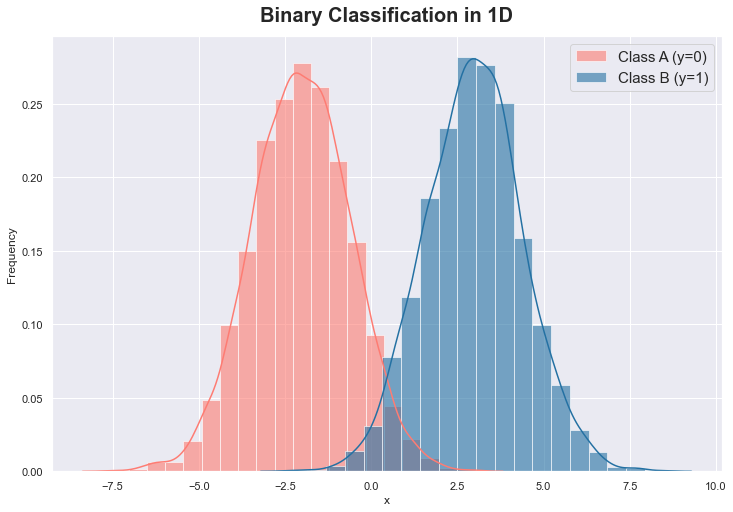

In [6]:
# Generate random data
distribution_1 = np.random.normal(mean_1, np.sqrt(variance), num_points)
distribution_2 = np.random.normal(mean_2, np.sqrt(variance), num_points)

fig, ax = plt.subplots(figsize = (12, 8))
# Create histograms and KDE plots
ax.hist(distribution_1, bins=20, alpha=0.6, label='Class A (y=0)', density=True, color = colors[0])
ax.hist(distribution_2, bins=20, alpha=0.6, label='Class B (y=1)', density=True, color = colors[1])
sns.kdeplot(distribution_1, ax = ax, color = colors[0])
sns.kdeplot(distribution_2, ax = ax, color = colors[1])

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
ax.set_title('Binary Classification in 1D', weight = "bold", fontsize = 20, pad = 15)
plt.legend(fontsize = 15)

# Show plot
plt.show()


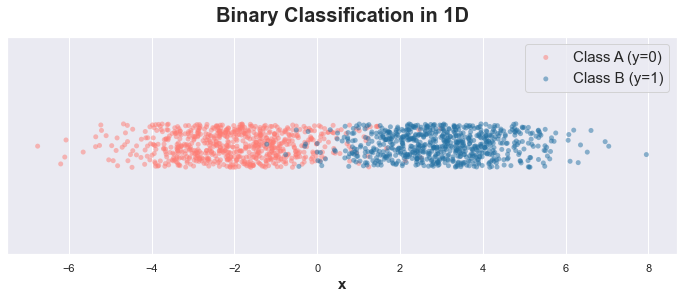

In [7]:
## Sample some data points for clear display

fig, ax = plt.subplots(figsize = (12, 4))
# Create histograms
sns.stripplot(np.random.choice(distribution_1, 700, replace=False), ax = ax, label='Class A (y=0)', alpha=0.5, color = colors[0])
sns.stripplot(np.random.choice(distribution_2, 700, replace=False), ax = ax, label='Class B (y=1)', alpha=0.5, color = colors[1])

# Add labels and legend
ax.set_xlabel('x', weight = "bold", fontsize = 15)
ax.set_title('Binary Classification in 1D', weight = "bold", fontsize = 20, pad = 15)
plt.legend(fontsize = 15)

# Show plot
plt.show()

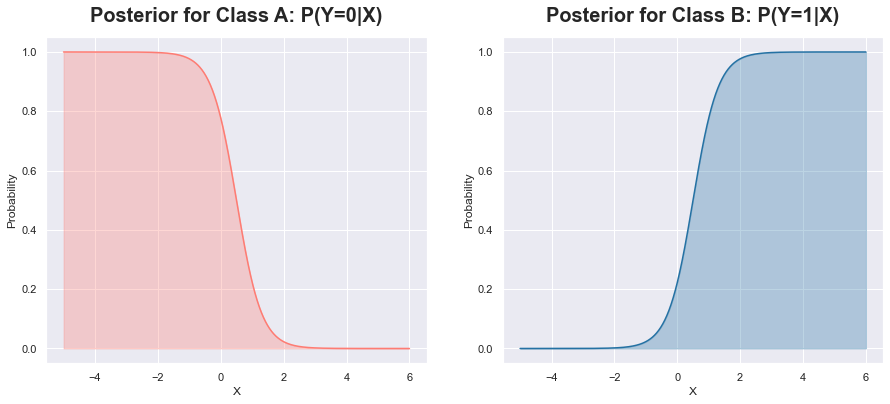

In [9]:
## Model posteriors using Bayes' rule


# Prior probabilities (assuming equal priors)
prior_1 = prior_2 = 0.5

# Range of x values for plotting
x_range = np.linspace(-5, 6, 1000)

# Calculate class-conditional densities (likelihoods)
likelihood_1 = norm.pdf(x_range, mean_1, np.sqrt(variance))
likelihood_2 = norm.pdf(x_range, mean_2, np.sqrt(variance))

# Calculate posteriors using Bayes' rule
posterior_1 = likelihood_1 * prior_1
posterior_2 = likelihood_2 * prior_2

# Normalize the posteriors
posterior_1_1 = posterior_1/(posterior_1 + posterior_2)
posterior_2_1 = posterior_2/(posterior_1 + posterior_2)

fig, ax = plt.subplot_mosaic("AB", figsize = (15, 6))

# Create posterior plot
ax["A"].plot(x_range, posterior_1_1, label='Posterior for Class A (P(Y=0|X))', color = colors[0])

# Fill the areas under the curves
ax["A"].fill_between(x_range, posterior_1_1, alpha=0.3, color = colors[0])

# Add labels and legend
ax["A"].set_xlabel('X')
ax["A"].set_ylabel('Probability')
ax["A"].set_title('Posterior for Class A: P(Y=0|X)', weight = "bold", fontsize = 20, pad = 15)


ax["B"].plot(x_range, posterior_2_1, label='Posterior for Class B (P(Y=1|X))', color = colors[1])

# Fill the areas under the curves
ax["B"].fill_between(x_range, posterior_2_1, alpha=0.3, color = colors[1])

# Add labels and legend
ax["B"].set_xlabel('X')
ax["B"].set_ylabel('Probability')
ax["B"].set_title('Posterior for Class B: P(Y=1|X)', weight = "bold", fontsize = 20, pad = 15)
# plt.legend()

# Show plot
plt.show()


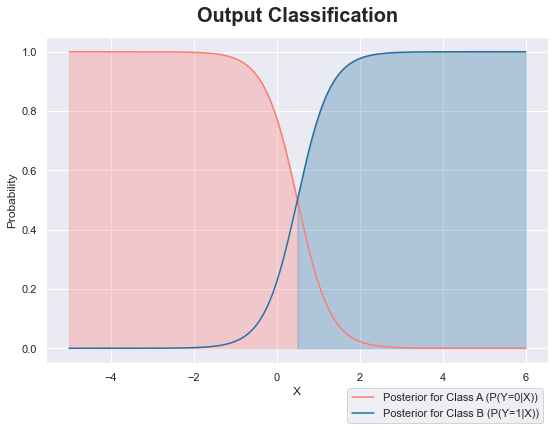

In [10]:
## Model posteriors using Bayes' rule in a combined plot

# Prior probabilities (assuming equal priors)
prior_1 = prior_2 = 0.5

# Range of x values for plotting
x_range = np.linspace(-5, 6, 1000)

# Calculate class-conditional densities (likelihoods)
likelihood_1 = norm.pdf(x_range, mean_1, np.sqrt(variance))
likelihood_2 = norm.pdf(x_range, mean_2, np.sqrt(variance))

# Calculate posteriors using Bayes' rule
posterior_1 = likelihood_1 * prior_1
posterior_2 = likelihood_2 * prior_2

# Normalize the posteriors
posterior_1_1 = posterior_1/(posterior_1 + posterior_2)
posterior_2_1 = posterior_2/(posterior_1 + posterior_2)

fig, ax = plt.subplots(figsize = (9, 6))

# Create posterior plot
ax.plot(x_range, posterior_1_1, label='Posterior for Class A (P(Y=0|X))', color = colors[0])
ax.plot(x_range, posterior_2_1, label='Posterior for Class B (P(Y=1|X))', color = colors[1])

# Fill the areas under the curves
threshold = 0.5
ax.fill_between(x_range, posterior_1_1, where=(x_range < threshold), alpha=0.3, color = colors[0])
ax.fill_between(x_range, posterior_2_1, where=(x_range > threshold), alpha=0.3, color = colors[1])


# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Probability')
ax.set_title('Output Classification', weight = "bold", fontsize = 20, pad = 15)
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.2))

# plt.savefig("binary_posterior1.jpeg", dpi=300, bbox_inches="tight")
# Show plot
plt.show()


### Comparing situation of equal variance and prior vs. unequal variance and priors

### Bayes rule

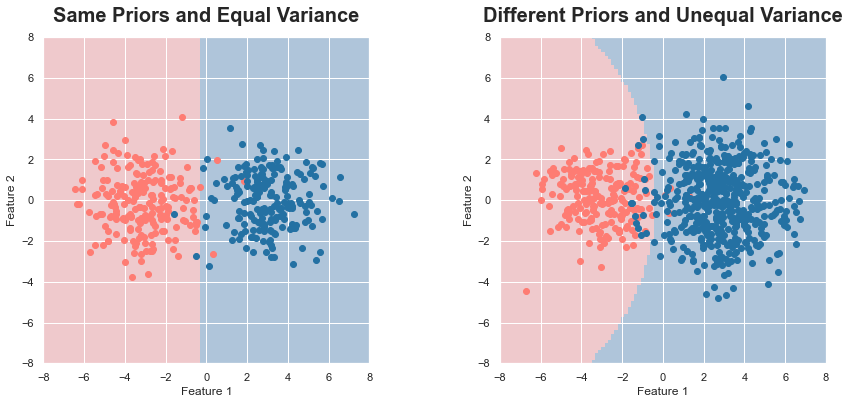

In [19]:
# Parameters
fig, ax = plt.subplot_mosaic("AB", figsize = (15, 6))

num_points11 = 200
num_points21 = 200
mean_1 = np.array([-3, 0])
mean_2 = np.array([3, 0])
covariance_1 = np.array([[2, 0], [0, 2]])
covariance_2 = np.array([[2, 0], [0, 2]])

# Generate random data
distribution_11 = np.random.multivariate_normal(mean_1, covariance_1, num_points11)
distribution_21 = np.random.multivariate_normal(mean_2, covariance_2, num_points21)

# Prior probabilities (assuming equal priors)
prior_1 = num_points1/(num_points11+num_points21)
prior_2 = num_points2/(num_points11+num_points21)

# Range of x and y values for plotting
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Calculate class-conditional densities (likelihoods)
likelihood_1 = multivariate_normal.pdf(points, mean_1, covariance_1)
likelihood_2 = multivariate_normal.pdf(points, mean_2, covariance_2)

# Reshape likelihoods to match X, Y dimensions
likelihood_1 = likelihood_1.reshape(X.shape)
likelihood_2 = likelihood_2.reshape(X.shape)

# Calculate posteriors using Bayes' rule
posterior_1 = likelihood_1 * prior_1
posterior_2 = likelihood_2 * prior_2

# Normalize the posteriors
posterior_1_1 = posterior_1/(posterior_1 + posterior_2)
posterior_2_1 = posterior_2/(posterior_1 + posterior_2)

decision_regions = np.where(posterior_1_1 > posterior_2_1, 1, 0)


ax["A"].imshow(decision_regions, extent=(-8, 8, -8, 8), cmap=ListedColormap(colors[0:2:][::-1]), alpha=0.3)

# Add scatter plots for the data points
ax["A"].scatter(distribution_11[:, 0], distribution_11[:, 1], c=colors[0], label='Class A')
ax["A"].scatter(distribution_21[:, 0], distribution_21[:, 1], c=colors[1], label='Class B')



# Add labels and legend
ax["A"].set_xlabel('Feature 1')
ax["A"].set_ylabel('Feature 2')
ax["A"].set_title('Same Priors and Equal Variance', weight = "bold", fontsize = 20, pad = 15)



num_points12 = 200
num_points22 = 500
mean_1 = np.array([-3, 0])
mean_2 = np.array([3, 0])
covariance_1 = np.array([[2, 0], [0, 2]])
covariance_2 = np.array([[3, 0], [0, 3]])

# Generate random data
distribution_12 = np.random.multivariate_normal(mean_1, covariance_1, num_points12)
distribution_22 = np.random.multivariate_normal(mean_2, covariance_2, num_points22)

# Prior probabilities (assuming equal priors)
prior_1 = num_points1/(num_points12+num_points22)
prior_2 = num_points2/(num_points12+num_points22)

# Range of x and y values for plotting
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Calculate class-conditional densities (likelihoods)
likelihood_1 = multivariate_normal.pdf(points, mean_1, covariance_1)
likelihood_2 = multivariate_normal.pdf(points, mean_2, covariance_2)

# Reshape likelihoods to match X, Y dimensions
likelihood_1 = likelihood_1.reshape(X.shape)
likelihood_2 = likelihood_2.reshape(X.shape)

# Calculate posteriors using Bayes' rule
posterior_1 = likelihood_1 * prior_1
posterior_2 = likelihood_2 * prior_2

# Normalize the posteriors
posterior_1_1 = posterior_1/(posterior_1 + posterior_2)
posterior_2_1 = posterior_2/(posterior_1 + posterior_2)

decision_regions = np.where(posterior_1_1 > posterior_2_1, 1, 0)


ax["B"].imshow(decision_regions, extent=(-8, 8, -8, 8), cmap=ListedColormap(colors[0:2:][::-1]), alpha=0.3)

# Add scatter plots for the data points
ax["B"].scatter(distribution_12[:, 0], distribution_12[:, 1], c=colors[0], label='Class A')
ax["B"].scatter(distribution_22[:, 0], distribution_22[:, 1], c=colors[1], label='Class B')



# Add labels and legend
ax["B"].set_xlabel('Feature 1')
ax["B"].set_ylabel('Feature 2')
ax["B"].set_title('Different Priors and Unequal Variance', weight = "bold", fontsize = 20, pad = 15)

# Show plot
plt.show()


### Logistic regression

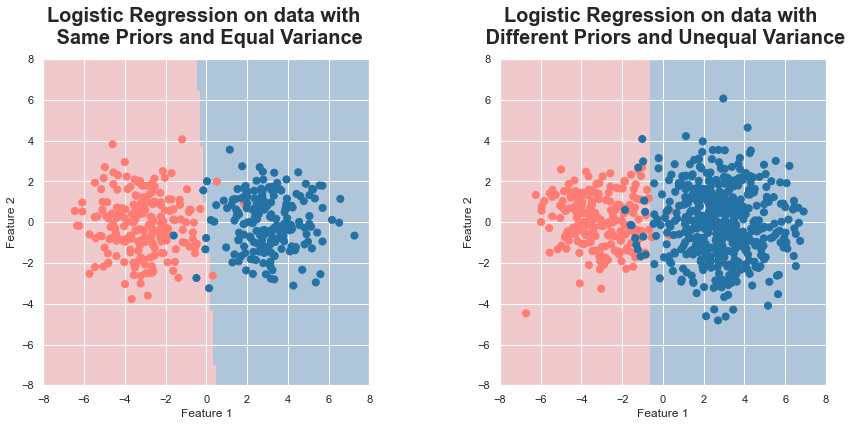

In [21]:
fig, ax = plt.subplot_mosaic("AB", figsize = (15, 6))

data = np.vstack((distribution_11, distribution_21))
labels = np.hstack((np.ones(num_points11), np.zeros(num_points21)))

# Fit logistic regression model
model = LogisticRegression()
model.fit(data, labels)

# Range of x and y values for plotting
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Predict probabilities using the fitted logistic regression model
probabilities = model.predict_proba(points)
decision_regions = probabilities[:, 1].reshape(X.shape)

# Custom colors for decision regions
color_map = ['lightblue', 'lightcoral']

# Create a heatmap with custom colors for decision regions
ax["A"].imshow(decision_regions, extent=(-8, 8, -8, 8), cmap=ListedColormap(colors[0:2:][::-1]), alpha=0.3)

# Add scatter plots for the data points
ax["A"].scatter(data[:, 0], data[:, 1], c=labels, cmap=ListedColormap(colors[0:2:][::-1]), marker='o', s=50)

# Add labels and legend
ax["A"].set_xlabel('Feature 1')
ax["A"].set_ylabel('Feature 2')
ax["A"].set_title('Logistic Regression on data with \n Same Priors and Equal Variance', weight = "bold", fontsize = 20, pad = 15)


data = np.vstack((distribution_12, distribution_22))
labels = np.hstack((np.ones(num_points21), np.zeros(num_points22)))

# Fit logistic regression model
model = LogisticRegression()
model.fit(data, labels)

# Range of x and y values for plotting
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
points = np.c_[X.ravel(), Y.ravel()]

# Predict probabilities using the fitted logistic regression model
probabilities = model.predict_proba(points)
decision_regions = probabilities[:, 1].reshape(X.shape)

# Custom colors for decision regions

# Create a heatmap with custom colors for decision regions
ax["B"].imshow(decision_regions, extent=(-8, 8, -8, 8), cmap=ListedColormap(colors[0:2:][::-1]), alpha=0.3)

# Add scatter plots for the data points
ax["B"].scatter(data[:, 0], data[:, 1], c=labels, cmap=ListedColormap(colors[0:2:][::-1]), marker='o', s=50)

# Add labels and legend
ax["B"].set_xlabel('Feature 1')
ax["B"].set_ylabel('Feature 2')
ax["B"].set_title('Logistic Regression on data with \n Different Priors and Unequal Variance', weight = "bold", fontsize = 20, pad = 15)


# Show plot
plt.show()
